# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.737  1  1.429 0.233 0.007   
                             age        0.092  1  0.178 0.674 0.001   
                             Kiel       1.914  1  3.711 0.056 0.019   
                             Magdeburg  4.024  1  7.801 0.006 0.039   
                             Sweden     6.605  1 12.804 0.000 0.063   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.111  1  0.108 0.743 0.001   
                             age        1.028  1  1.004 0.318 0.005   
                             Kiel       0.079  1  0.077 0.782 0.000   
                             Magdeburg  2.934  1  2.865 0.092 0.015   
                             Sweden    14.690  1 14.345 0.000 0.070   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.632  0.387    False  
                             age               0.172  0.788    False  
                             Kiel              1.255  0.132    False  
                             Magdeburg         2.240  0.021     True  
                             Sweden            3.358  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.129  0.837    False  
                             age               0.498  0.482    False  
                             Kiel              0.107  0.865    False  
                             Magdeburg         1.035  0.195    False  
                             Sweden            3.691  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.941  1  6.995 0.009 0.035   
                             age        0.003  1  0.022 0.882 0.000   
                             Kiel       0.220  1  1.636 0.202 0.008   
                             Magdeburg  0.433  1  3.218 0.074 0.017   
                             Sweden     1.629  1 12.112 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.103  1  2.375 0.125 0.012   
                             age        0.879  1  1.894 0.170 0.010   
                             Kiel       1.868  1  4.024 0.046 0.021   
                             Magdeburg  1.685  1  3.630 0.058 0.019   
                             Sweden    12.475  1 26.872 0.000 0.123   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.053  0.025     True  
                             age               0.054  0.926    False  
                             Kiel              0.694  0.328    False  
                             Magdeburg         1.128  0.148    False  
                             Sweden            3.207  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.903  0.224    False  
                             age               0.769  0.286    False  
                             Kiel              1.335  0.101    False  
                             Magdeburg         1.235  0.121    False  
                             Sweden            6.259  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.233         0.632  0.387    False   
                             Kiel      0.056         1.255  0.132    False   
                             Magdeburg 0.006         2.240  0.021     True   
                             Sweden    0.000         3.358  0.002     True   
                             age       0.674         0.172  0.788    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.743         0.129  0.837    False   
                             Kiel      0.782         0.107  0.865    False   
                             Magdeburg 0.092         1.035  0.195    False   
                             Sweden    0.000         3.691  0.001     True   
                             age       0.318         0.498  0.482    False   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.009         2.053  0.025     True  
                             Kiel      0.202         0.694  0.328    False  
                             Magdeburg 0.074         1.128  0.148    False  
                             Sweden    0.001         3.207  0.003     True  
                             age       0.882         0.054  0.926    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.125         0.903  0.224    False  
                             Kiel      0.046         1.335  0.101    False  
                             Magdeburg 0.058         1.235  0.121    False  
                             Sweden    0.000         6.259  0.000     True  
                             age       0.170         0.769  0.286    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.486     0.335     0.235         3.096     0.294
std       0.302         5.282     0.330     0.298         5.855     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.335     0.015     0.001         0.380     0.003
50%       0.117         0.932     0.234     0.072         1.144     0.143
75%       0.463         2.439     0.617     0.416         3.122     0.555
max       1.000       142.049     1.000     0.999        85.539     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_49621/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.233         0.632   
A0A024R0T9;K7ER74;P02655                           AD     0.052         1.283   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.082         1.084   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.470         0.328   
A0A075B6H7                                         AD     0.223         0.652   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.033         1.487   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.709         0.150   
S4R3U6                                             AD     0.743         0.129   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.387    False   
A0A024R0T9;K7ER74;P02655                           AD      0.125    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.179    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.623    False   
A0A075B6H7                                         AD      0.375    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.087    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.813    False   
S4R3U6                                             AD      0.837    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.009         2.053   
A0A024R0T9;K7ER74;P02655                           AD     0.033         1.484   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.430         0.367   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.256         0.591   
A0A075B6H7                                         AD     0.001         2.835   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.237         0.626   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.416         0.381   
S4R3U6                                             AD     0.125         0.903   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.025     True  
A0A024R0T9;K7ER74;P02655                           AD      0.076    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.568    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.391    False  
A0A075B6H7                                         AD      0.005     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.413     0.335     0.249         1.516     0.315
std       0.291         1.663     0.316     0.296         1.763     0.320
min       0.000         0.002     0.000     0.000         0.003     0.000
25%       0.011         0.357     0.037     0.009         0.357     0.026
50%       0.122         0.915     0.241     0.103         0.986     0.192
75%       0.439         1.943     0.597     0.439         2.049     0.576
max       0.996        24.061     0.997     0.994        18.502     0.996

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1031,958


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.233         0.632  0.387   
A0A024R0T9;K7ER74;P02655                           0.052         1.283  0.125   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.082         1.084  0.179   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.470         0.328  0.623   
A0A075B6H7                                         0.223         0.652  0.375   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.033         1.487  0.087   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.709         0.150  0.813   
S4R3U6                                             0.743         0.129  0.837   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.009   
A0A024R0T9;K7ER74;P02655                              False 0.033   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.430   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.256   
A0A075B6H7                                            False 0.001   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.237   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.416   
S4R3U6                                                False 0.125   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.053  0.025   
A0A024R0T9;K7ER74;P02655                                   1.484  0.076   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.367  0.568   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.591  0.391   
A0A075B6H7                                                 2.835  0.005   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.293   
Q9Y6X5                                                     0.626  0.369   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.163   
Q9Y6Y9                                                     0.381  0.555   
S4R3U6                                                     0.903  0.224   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    892
PI (yes) - RF (yes)   324
PI (no)  - RF (yes)   139
PI (yes) - RF (no)     66
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_49621/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.233         0.632  0.387   
A0A075B6H7                                         0.223         0.652  0.375   
A0A075B6I0                                         0.017         1.771  0.052   
A0A075B6R2                                         0.314         0.502  0.478   
A0A075B7B8                                         0.030         1.520  0.082   
...                                                  ...           ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.007         2.145  0.026   
Q9ULZ9                                             0.000         3.589  0.002   
Q9UNW1                                             0.012         1.928  0.038   
Q9UP79                                             0.149         0.826  0.279   
Q9UQ52                                             0.059         1.231  0.138   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.009   
A0A075B6H7                                            False 0.001   
A0A075B6I0                                            False 0.001   
A0A075B6R2                                            False 0.002   
A0A075B7B8                                            False 0.000   
...                                                     ...   ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True 0.295   
Q9ULZ9                                                 True 0.054   
Q9UNW1                                                 True 0.911   
Q9UP79                                                False 0.000   
Q9UQ52                                                False 0.001   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.053  0.025   
A0A075B6H7                                                 2.835  0.005   
A0A075B6I0                                                 3.168  0.003   
A0A075B6R2                                                 2.822  0.006   
A0A075B7B8                                                 4.501  0.000   
...                                                          ...    ...   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         0.530  0.434   
Q9ULZ9                                                     1.265  0.114   
Q9UNW1                                                     0.041  0.946   
Q9UP79                                                     3.830  0.001   
Q9UQ52                                                     2.974  0.004   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A075B6H7                                             True        91  
A0A075B6I0                                             True       194  
A0A075B6R2                                             True       164  
A0A075B7B8                                             True        57  
...                                                     ...       ...  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False       115  
Q9ULZ9                                                False       171  
Q9UNW1                                                False       171  
Q9UP79                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.387,0.025,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.125,0.076,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.179,0.568,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.623,0.391,196,PI (no) - RF (no)
A0A075B6H7,0.375,0.005,91,PI (no) - RF (yes)
...,...,...,...,...
Q9Y6R7,0.315,0.293,197,PI (no) - RF (no)
Q9Y6X5,0.087,0.369,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.163,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P52758,0.001,0.988,119,PI (yes) - RF (no),0.987
F6VDH7;P50502;Q3KNR6,0.010,0.956,175,PI (yes) - RF (no),0.946
O00187;O00187-2,0.974,0.029,119,PI (no) - RF (yes),0.945
Q96PQ0,0.005,0.948,177,PI (yes) - RF (no),0.943
P48745,0.952,0.012,180,PI (no) - RF (yes),0.940
...,...,...,...,...,...
F5GY80;F5H7G1;P07358,0.057,0.048,197,PI (no) - RF (yes),0.009
A0A0J9YXX1,0.057,0.049,197,PI (no) - RF (yes),0.009
Q9NX62,0.055,0.047,197,PI (no) - RF (yes),0.008


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


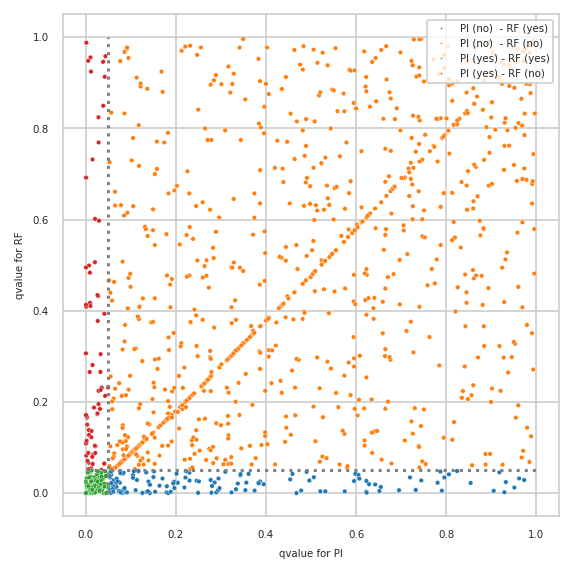

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


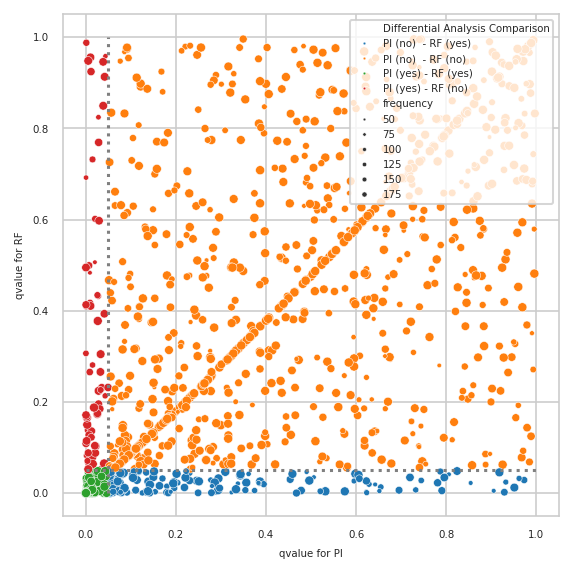

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN1,ENSP00000326366,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
FRAT2,ENSP00000360058,0.681
CLEC4M,ENSP00000316228,0.681
DSC2,ENSP00000280904,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/3fa5fb1d5dd2a817778dc1597a6471cf_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out